In [377]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from scipy import optimize
from scipy.stats import norm
from tabulate import tabulate

PARTE I

Enunciado A

In [338]:
archivo = open("DataRotacion.csv") 
datos = pd.read_csv(archivo,sep=',') 
print(datos)

        h  angle       y  sigmay
0    10.0   10.0  0.0017  0.0015
1    20.0   10.0  0.0016  0.0015
2    30.0   10.0  0.0027  0.0015
3    40.0   10.0  0.0055  0.0015
4    50.0   10.0  0.0083  0.0015
5    60.0   10.0  0.0085  0.0015
6    70.0   10.0  0.0096  0.0015
7    80.0   10.0  0.0144  0.0015
8    90.0   10.0  0.0200  0.0015
9   100.0   10.0  0.0208  0.0015
10   10.0   20.0  0.0007  0.0015
11   20.0   20.0  0.0016  0.0015
12   30.0   20.0  0.0030  0.0015
13   40.0   20.0  0.0043  0.0015
14   50.0   20.0  0.0078  0.0015
15   60.0   20.0  0.0092  0.0015
16   70.0   20.0  0.0106  0.0015
17   80.0   20.0  0.0142  0.0015
18   90.0   20.0  0.0181  0.0015
19  100.0   20.0  0.0210  0.0015
20   10.0   30.0  0.0013  0.0015
21   20.0   30.0  0.0017  0.0015
22   30.0   30.0  0.0038  0.0015
23   40.0   30.0  0.0059  0.0015
24   50.0   30.0  0.0067  0.0015
25   60.0   30.0  0.0094  0.0015
26   70.0   30.0  0.0122  0.0015
27   80.0   30.0  0.0132  0.0015
28   90.0   30.0  0.0151  0.0015
29  100.0 

Enunciado B

In [339]:
datos_30 = datos[datos["angle"]==30]

In [340]:
print(datos_30)

        h  angle       y  sigmay
20   10.0   30.0  0.0013  0.0015
21   20.0   30.0  0.0017  0.0015
22   30.0   30.0  0.0038  0.0015
23   40.0   30.0  0.0059  0.0015
24   50.0   30.0  0.0067  0.0015
25   60.0   30.0  0.0094  0.0015
26   70.0   30.0  0.0122  0.0015
27   80.0   30.0  0.0132  0.0015
28   90.0   30.0  0.0151  0.0015
29  100.0   30.0  0.0186  0.0015


Enunciado C

In [341]:
def modelo_coriolis(h, p, lambda_, g): 
    cos_lambda = np.cos(np.deg2rad(lambda_)) 
    return ((2*(2**(1/2)))/3)*p* cos_lambda*(((h**3)/g)**(1/2))

Enunciado D

In [342]:
def X_2 (parametros, h, y, sigmay, angle, g): 
    p = parametros[0] 
    modelo = modelo_coriolis(h, p, angle, g) 
    sum_desv = np.sum(((y - modelo)/sigmay)**2) 
    return sum_desv

Enunciado E

In [343]:
h = np.float64(datos_30['h'])
y = np.float64(datos_30['y'])
sigmay = np.float64(datos_30['sigmay'])
angle = 30.0 
g = 9.81

In [344]:
valor_inicial = 1e-5
resultado = optimize.minimize(X_2, valor_inicial, args=(h, y, sigmay, angle, g)) 
velocidad_angular = resultado.x[0]

In [345]:
print("El valor estimado de la velocidad angular es {0}".format(velocidad_angular))

El valor estimado de la velocidad angular es 7.243998213777981e-05


Enunciado F

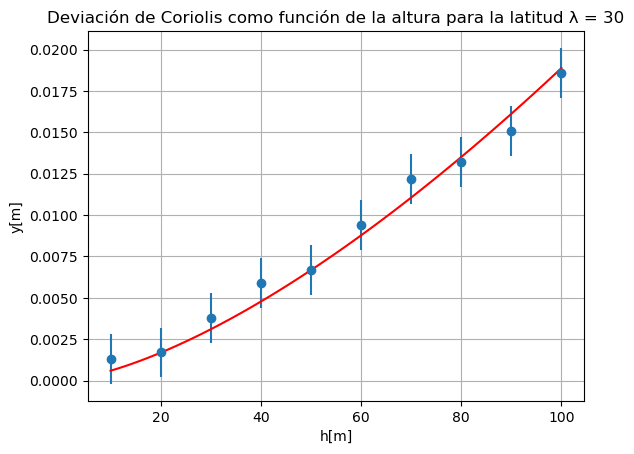

In [346]:
plt.errorbar(h, y, sigmay, fmt='o') 
valores_h = np.linspace(min(h), max(h), 100) 
valores_modelo_coriolis = modelo_coriolis(valores_h, velocidad_angular, angle, g) 
plt.plot(valores_h, valores_modelo_coriolis, color="red")
plt.xlabel('h[m]') 
plt.ylabel('y[m]') 
plt.title('Deviación de Coriolis como función de la altura para la latitud λ = 30')  
plt.grid() 
plt.show()

PARTE II - Propagación de la incertidumbre de la aceleración de la gravedad

Enunciados A, B, C, D y E

In [347]:
# Enunciado A
N = 300
Gravedad = np.zeros(N)
Omega = np.zeros(N)

for i in range(N):
    # Enunciado B
    g_experimental = 9.81 + np.random.normal(loc=0, scale=1)
    # Enunciado C
    Gravedad[i] = g_experimental

    # Enunciado D
    y_experimental = y + np.random.normal(loc=0, scale=sigmay[0], size=len(y))

    # Enunciado E
    resultado_experimental = optimize.minimize(X_2, x0=[7e-5], args=(h, y_experimental, sigmay, angle, g_experimental))
    valor_estimado_omega = resultado_experimental.x[0]
    Omega[i] = valor_estimado_omega


Enunciado F

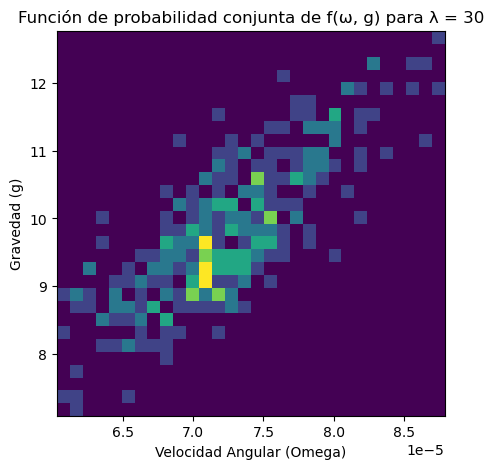

In [348]:
num_bins_x = 30
num_bins_y = 30

H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=[num_bins_x, num_bins_y])

plt.figure(figsize=(5, 5))
plt.imshow(H2.T, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]], cmap='viridis', aspect='auto')
plt.xlabel('Velocidad Angular (Omega)')
plt.ylabel('Gravedad (g)')
plt.title('Función de probabilidad conjunta de f(ω, g) para λ = 30')
plt.show()

Enunciado G

In [ ]:
#Foto

Enunciado H

In [349]:
H1 = np.sum(H2,axis=1)
H1

array([ 3.,  6.,  4.,  5.,  7.,  8.,  9.,  8., 19., 12., 19., 30., 25.,
       23., 18., 20., 17.,  8., 10., 13.,  7.,  9.,  3.,  6.,  3.,  2.,
        0.,  2.,  2.,  2.])

Enunciado I

In [350]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )
print(cs)
print(ij)
print(ii)
print(ji)

[  3.   9.  13.  18.  25.  33.  42.  50.  69.  81. 100. 130. 155. 178.
 196. 216. 233. 241. 251. 264. 271. 280. 283. 289. 292. 294. 294. 296.
 298. 300.]
5
15
25


Enunciado J

In [375]:
latitudes = [10, 20, 30, 40, 50, 60, 'Combined']

histograms = [703, 683, 730, 750, 672, 735, 704]
confidence_intervals = [[625, 789], [594, 782], [642, 818], [657, 853], [573, 783], [627, 856], [630, 787]]
sigmas = [0.067, 0.066, 0.085, 0.1, 0.126, 0.15, 0.036]

omega_estimates = [h / 10000 for h in histograms]
lower_limits = [ci[0] / 10000 for ci in confidence_intervals]
upper_limits = [ci[1] / 10000 for ci in confidence_intervals]

table_data = []
for i in range(len(latitudes)):
    if latitudes[i] == 'Combined':
        table_data.append(['Combined', omega_estimates[i], f'[{lower_limits[i]}, {upper_limits[i]}]', sigmas[i]])
    else:
        table_data.append([latitudes[i], omega_estimates[i], f'[{lower_limits[i]}, {upper_limits[i]}]', sigmas[i]])

table_headers = ['λ', 'ωˆ × 10^-5', 'IC68% × 10^-5', 'σ+/ωˆ']
table = tabulate(table_data, headers=table_headers, floatfmt=".2f")
print(table)


λ           ωˆ × 10^-5  IC68% × 10^-5       σ+/ωˆ
--------  ------------  ----------------  -------
10                0.07  [0.0625, 0.0789]     0.07
20                0.07  [0.0594, 0.0782]     0.07
30                0.07  [0.0642, 0.0818]     0.09
40                0.07  [0.0657, 0.0853]     0.10
50                0.07  [0.0573, 0.0783]     0.13
60                0.07  [0.0627, 0.0856]     0.15
Combined          0.07  [0.063, 0.0787]      0.04
